<a href="https://colab.research.google.com/github/MauricioTellezNava/inseguridad_alimentariamx2020/blob/main/inseg_alimentaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notas

Se utilizó la Encuesta Nacional de Ingresos y Gastos de los Hogares (ENIGH) 2020 para construir el dataframe "df". Para su creación se procesaron siete conjuntos de datos, los cuales contenían información relacionada con el ingreso, gasto por hogar, trabajo, población, vivienda y hogar.

El dataset final "df" cuenta con 79,274 registros y 113 columnas.

## Objetivos

El objetivo de este proyecto consiste en entrenar un modelo de Machine Learning capaz de predecir la cantidad de hogares mexicanos que presentan inseguridad alimentaria..

## Carga

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DEV F. - Proyectos/PROYECTS/Cobertura médica en los hogares mexicanos/df.csv")
print(df.shape)
df.head()

(79274, 113)


,folioviv,numrentrab,htrab,scian,sinco,medtrab_7,ing_tri,gasto_tri,numrenpob,edad,...,num_radio,num_refri,num_tosta,num_tva,num_tvd,num_van,num_venti,num_video,tsalud1_h,tv_paga
0,100013605,1,30,1,1,0,16229.49,22693.22,3,26.333333,...,0,1,0,0,0,0,1,0,0,2
1,100013606,1,48,1,1,0,23827.86,18931.42,4,29.250000,...,1,1,0,0,2,0,0,0,0,2
2,100017801,2,70,2,2,0,37421.77,44520.13,2,26.000000,...,0,1,1,0,2,0,1,0,0,2
3,100017802,1,40,1,1,0,71557.37,76500.43,2,18.000000,...,0,1,1,0,1,0,4,0,0,1
4,100017803,1,40,1,1,0,71803.26,30140.68,2,61.000000,...,0,1,0,0,3,0,2,0,0,1


In [ ]:
# df.corr().to_excel("/content/drive/MyDrive/DEV F. - Proyectos/PROYECTS/Cobertura médica en los hogares mexicanos/df_corr.xlsx")

#### Celdas correlacionadas en al menos un 0.8% con otras:

* sinco
* alfabe_si
* hor_1
* tot_resid
* tot_hom
* tot_muj
* prob_sal_si
* autocons


In [ ]:
# Eliminando columnas correlacionadas
columnasdf = ['sinco', 'alfabe_si', 'hor_1', 'tot_resid', 'tot_hom', 'tot_muj', 'prob_sal_si', 'autocons']
df2 = df.drop(columnasdf, axis=1)
df2 = df2.set_index(df["folioviv"])
df2 = df2.drop("folioviv", axis=1)
print(df2.shape)
df2.head()

(79274, 104)


,numrentrab,htrab,scian,medtrab_7,ing_tri,gasto_tri,numrenpob,edad,nivelaprob,hor_2,...,num_radio,num_refri,num_tosta,num_tva,num_tvd,num_van,num_venti,num_video,tsalud1_h,tv_paga
folioviv,,,,,,,,,,,,,,,,,,,,,
100013605,1,30,1,0,16229.49,22693.22,3,26.333333,4.666667,71,...,0,1,0,0,0,0,1,0,0,2
100013606,1,48,1,0,23827.86,18931.42,4,29.250000,4.000000,49,...,1,1,0,0,2,0,0,0,0,2
100017801,2,70,2,0,37421.77,44520.13,2,26.000000,7.000000,20,...,0,1,1,0,2,0,1,0,0,2
100017802,1,40,1,0,71557.37,76500.43,2,18.000000,4.000000,60,...,0,1,1,0,1,0,4,0,0,1
100017803,1,40,1,0,71803.26,30140.68,2,61.000000,4.500000,100,...,0,1,0,0,3,0,2,0,0,1


#### Segmentando df en un dataset de variables dummy y un conjunto de variables restante

In [ ]:
def es_dummy(col):
    return set(col) <= {0, 1}

dummy_cols = df2.apply(es_dummy)
dummy_cols = dummy_cols[dummy_cols].index.tolist()
print(len(dummy_cols))


24


In [ ]:
# Creando los dataframes df_dummies y df_no_dummies
df_dummies = df2[dummy_cols]
df_no_dummies = df2.drop(dummy_cols, axis=1)
print("df_dummies:", df_dummies.shape)
print("df_no_dummies:", df_no_dummies.shape)

df_dummies: (79274, 24)
df_no_dummies: (79274, 80)


## Preprocesamiento

In [ ]:
# Estandarizando los valores no dummies
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_std = pd.DataFrame(scaler.fit_transform(df_no_dummies), columns=df_no_dummies.columns)
df_std = df_std.set_axis(df["folioviv"])
print(df_std.shape)
df_std.head()

(79274, 80)


,numrentrab,htrab,scian,medtrab_7,ing_tri,gasto_tri,numrenpob,edad,nivelaprob,hor_2,...,num_radio,num_refri,num_tosta,num_tva,num_tvd,num_van,num_venti,num_video,tsalud1_h,tv_paga
folioviv,,,,,,,,,,,,,,,,,,,,,
100013605,-0.883482,-1.032151,-0.83522,-0.800459,-0.378376,-0.220483,-0.423985,-0.580175,0.956368,-0.328814,...,-0.481882,0.278587,-0.377113,-0.555725,-1.217144,-0.373595,0.009728,-0.156948,-0.297659,0.895115
100013606,-0.883482,-0.692175,-0.83522,-0.800459,-0.277603,-0.373333,0.136824,-0.387802,0.493889,-0.734945,...,1.780656,0.278587,-0.377113,-0.555725,1.023477,-0.373595,-0.848122,-0.156948,-0.297659,0.895115
100017801,0.092850,-0.276650,0.24437,-0.800459,-0.097314,0.666386,-0.984794,-0.602161,2.575044,-1.270301,...,-0.481882,0.278587,2.590453,-0.555725,1.023477,-0.373595,0.009728,-0.156948,-0.297659,0.895115
100017802,-0.883482,-0.843276,-0.83522,-0.800459,0.355407,1.965808,-0.984794,-1.129812,0.493889,-0.531879,...,-0.481882,0.278587,2.590453,-0.555725,-0.096833,-0.373595,2.583280,-0.156948,-0.297659,-1.117174
100017803,-0.883482,-0.843276,-0.83522,-0.800459,0.358668,0.082121,-0.984794,1.706315,0.840748,0.206542,...,-0.481882,0.278587,-0.377113,-0.555725,2.143787,-0.373595,0.867579,-0.156948,-0.297659,-1.117174


In [ ]:
# Haciendo merge de df_std a df_dummies
df3 = df_dummies.reset_index(drop=True).join(df_std.reset_index(drop=True), how='left')
print(df3.shape)
df3.head()

(79274, 104)


,cocina,excusado,uso_compar,lavadero,fregadero,tinaco_azo,cisterna,pileta,calent_sol,calent_gas,...,num_radio,num_refri,num_tosta,num_tva,num_tvd,num_van,num_venti,num_video,tsalud1_h,tv_paga
0,1,1,0,1,1,1,1,0,0,1,...,-0.481882,0.278587,-0.377113,-0.555725,-1.217144,-0.373595,0.009728,-0.156948,-0.297659,0.895115
1,1,1,0,1,1,1,1,0,0,1,...,1.780656,0.278587,-0.377113,-0.555725,1.023477,-0.373595,-0.848122,-0.156948,-0.297659,0.895115
2,1,1,0,1,1,1,1,1,0,1,...,-0.481882,0.278587,2.590453,-0.555725,1.023477,-0.373595,0.009728,-0.156948,-0.297659,0.895115
3,1,1,0,1,1,1,1,0,0,1,...,-0.481882,0.278587,2.590453,-0.555725,-0.096833,-0.373595,2.583280,-0.156948,-0.297659,-1.117174
4,1,1,0,1,1,1,1,0,0,1,...,-0.481882,0.278587,-0.377113,-0.555725,2.143787,-0.373595,0.867579,-0.156948,-0.297659,-1.117174


In [ ]:
dummy_cols

['cocina',
 'excusado',
 'uso_compar',
 'lavadero',
 'fregadero',
 'tinaco_azo',
 'cisterna',
 'pileta',
 'calent_sol',
 'calent_gas',
 'medidor_luz',
 'bomba_agua',
 'tanque_gas',
 'aire_acond',
 'calefacc',
 'acc_alim1',
 'acc_alim2',
 'acc_alim3',
 'acc_alim6',
 'telefono',
 'celular',
 'conex_inte',
 'esc_radio',
 'negcua']

In [ ]:
print(df3.isna().sum().sum())
nan_locs = df3[df3.isna().any(axis=1)].stack(dropna=False)
nan_locs = nan_locs[nan_locs.isna()].index.tolist()
nan_locs  # Por el momento, omitimos la columna ing_tri

11


[(7687, 'ing_tri'),
 (12498, 'ing_tri'),
 (15538, 'ing_tri'),
 (22094, 'ing_tri'),
 (34462, 'ing_tri'),
 (59993, 'ing_tri'),
 (60476, 'ing_tri'),
 (65610, 'ing_tri'),
 (67089, 'ing_tri'),
 (73484, 'ing_tri'),
 (74023, 'ing_tri')]

## Support Vector Machines

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

x = df3.drop(["acc_alim1", "ing_tri"], axis = 1)
y = df3.acc_alim1

np.random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, stratify = y)

model = LinearSVC()
model.fit(x_train, y_train)
previsiones = model.predict(x_test)

tasa_acierto = accuracy_score(y_test, previsiones)
print(f"Entrenaremos con {len(x_train)} elementos y probaremos con {len(x_test)} elementos")
print(f"La tasa de acierto fue de: {round(tasa_acierto*100, 2)}%")

Entrenaremos con 59455 elementos y probaremos con 19819 elementos
La tasa de acierto fue de: 81.7%


/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## KNN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

x = df3.drop(["acc_alim1", "ing_tri"], axis = 1)
y = df3.acc_alim1

x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle=True,test_size = 0.25)

np.random.seed(42)

g = GridSearchCV(KNeighborsClassifier(), {"n_neighbors": [5, 7, 11, 13, 17]})
g.fit(x_train, y_train)

classifier = g.best_estimator_
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [ ]:
y_pred = classifier.predict(x_test)
y_test.values, y_pred

(array([0, 1, 0, ..., 0, 1, 1]), array([1, 1, 0, ..., 0, 1, 1]))

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[7735 2546]
 [3413 6125]]
              precision    recall  f1-score   support

           0       0.69      0.75      0.72     10281
           1       0.71      0.64      0.67      9538

    accuracy                           0.70     19819
   macro avg       0.70      0.70      0.70     19819
weighted avg       0.70      0.70      0.70     19819



## Random Forest

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

x = df3.drop(["acc_alim1", "ing_tri"], axis = 1)
y = df3.acc_alim1

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, stratify=y, random_state=1)

# instanciamos y ajustamos el modelo
dt = DecisionTreeClassifier(max_depth=4, random_state=1)
dt.fit(X_train, y_train)

# Generamos pronosticos
y_pred = dt.predict(X_test)

# obtenemos accuracy
print('accuracy: ', accuracy_score(y_test, y_pred))
print('-'*30)
# obtenemos precision
print('precision:', precision_score(y_test, y_pred))
print('-'*30)
# obtenemos recall
print('recall:   ', recall_score(y_test, y_pred))
print('-'*30)
# obtenemos f1
print('f1:       ', f1_score(y_test, y_pred))

accuracy:  0.8296079519652858
------------------------------
precision: 0.8928892889288929
------------------------------
recall:    0.7318718381112985
------------------------------
f1:        0.8044019693020562


In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[9498  833]
 [2544 6944]]
              precision    recall  f1-score   support

           0       0.79      0.92      0.85     10331
           1       0.89      0.73      0.80      9488

    accuracy                           0.83     19819
   macro avg       0.84      0.83      0.83     19819
weighted avg       0.84      0.83      0.83     19819



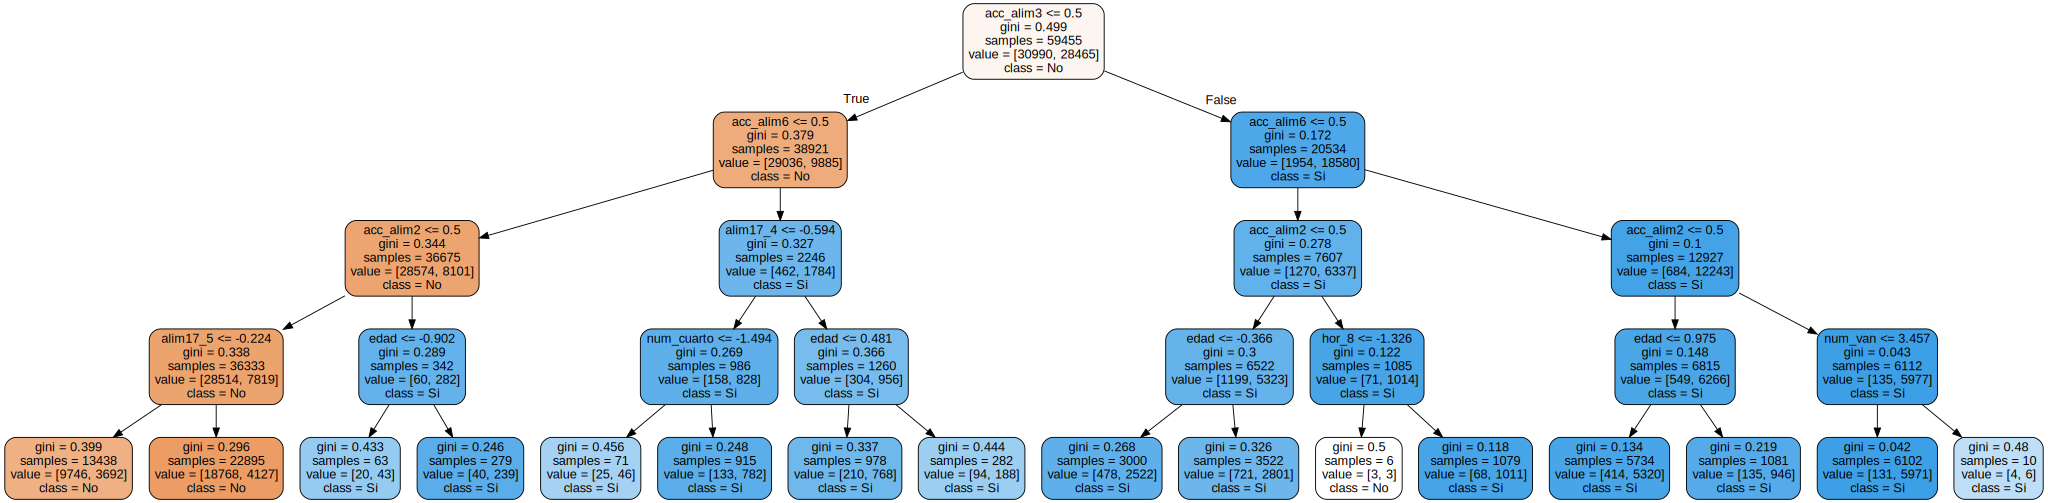

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(dt, feature_names = features, filled=True, rounded=True, class_names=["No", "Si"])
grafico = graphviz.Source(dot_data)
grafico

#### Las variables más relevantes fueron

* acc_alim6: Comió menos
* acc_alim2: Sin comida
* alim17_4: Número de días que comieron frutas

In [ ]:
# Valores predichos
values, counts = np.unique(y_pred, return_counts=True)

print(values) 
print(counts) 

[0 1]
[12042  7777]


In [ ]:
# Valores de prueba
values, counts = np.unique(y_test, return_counts=True)

print(values) 
print(counts) 

[0 1]
[10331  9488]


#### Probando parámetros

#### Iteración 2

In [ ]:
 '''
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

x = df3.drop(["acc_alim1", "ing_tri"], axis = 1)
y = df3.acc_alim1

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, stratify=y, random_state=1)

# instanciamos y ajustamos el modelo
dt = DecisionTreeClassifier(max_depth=4, random_state=1)
dt.fit(X_train, y_train)

# Generamos pronosticos
y_pred = dt.predict(X_test)

# obtenemos accuracy
print('accuracy: ', accuracy_score(y_test, y_pred))
print('-'*30)
# obtenemos precision
print('precision:', precision_score(y_test, y_pred))
print('-'*30)
# obtenemos recall
print('recall:   ', recall_score(y_test, y_pred))
print('-'*30)
# obtenemos f1
print('f1:       ', f1_score(y_test, y_pred))
'''

'\nfrom sklearn.tree import DecisionTreeClassifier\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report\n\nx = df3.drop(["acc_alim1", "ing_tri"], axis = 1)\ny = df3.acc_alim1\n\nX_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, stratify=y, random_state=1)\n\n# instanciamos y ajustamos el modelo\ndt = DecisionTreeClassifier(max_depth=4, random_state=1)\ndt.fit(X_train, y_train)\n\n# Generamos pronosticos\ny_pred = dt.predict(X_test)\n\n# obtenemos accuracy\nprint(\'accuracy: \', accuracy_score(y_test, y_pred))\nprint(\'-\'*30)\n# obtenemos precision\nprint(\'precision:\', precision_score(y_test, y_pred))\nprint(\'-\'*30)\n# obtenemos recall\nprint(\'recall:   \', recall_score(y_test, y_pred))\nprint(\'-\'*30)\n# obtenemos f1\nprint(\'f1:       \', f1_score(y_test, y_pred))\n'